age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   

         occupation    relationship    race    sex  capital-gain  \
0      Adm-clerical   Not-in-family   White   Male        2174.0   
1   Exec-managerial         Husband   White   Male           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States  <=50K  
1           0.0            13.0   United-States  <=50K

age          workclass education_level  education-num  \
0  0.301370          State-gov       Bachelors       0.800000   
1  0.452055   Self-emp-not-inc       Bachelors       0.800000   
2  0.287671            Private         HS-grad       0.533333   
3  0.493151            Private            11th       0.400000   
4  0.150685            Private       Bachelors       0.800000   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  
0      0.667492           0.0        0.397959   United-States  
1      0.000000           0.0        0.122449   United-States  
2      0.000000           0.0        0.397959   United-States  
3      0.000000           0.0        0.397959   United-States  
4      0.000000           0.0        0.397959            Cuba

age  education-num  capital-gain  capital-loss  hours-per-week  \
0  0.301370       0.800000      0.667492           0.0        0.397959   
1  0.452055       0.800000      0.000000           0.0        0.122449   
2  0.287671       0.533333      0.000000           0.0        0.397959   
3  0.493151       0.400000      0.000000           0.0        0.397959   
4  0.150685       0.800000      0.000000           0.0        0.397959   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   1   
3                       0                     0                   1   
4                       0                     0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
0                        0                            0   
1                        0                            1   
2                        0                            0   
3                        0                            0   
4                        0                            0   

              ...              native-country_ Portugal  \
0             ...                                     0   
1             ...                                     0   
2             ...                                     0   
3             ...                                     0   
4             ...                                     0   

   native-country_ Puerto-Rico  native-country_ Scotland  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   native-country_ South  native-country_ Taiwan  native-country_ Thailand  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   native-country_ Trinadad&Tobago  native-country_ United-States  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   native-country_ Vietnam  native-country_ Yugoslavia  
0                        0                           0  
1                        0                           0  
2                        0                           0  
3                        0                           0  
4                        0                           0  

[5 rows x 103 columns]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    0
Name: income, dtype: int64

Traning set has 36177 samples
Testing set has 9045 samples
Gaussian Naive Bayes:
             precision    recall  f1-score   support

          0       0.96      0.49      0.65      6840
          1       0.37      0.93      0.53      2205

avg / total       0.81      0.60      0.62      9045

LogisticRegression：
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      6840
          1       0.71      0.60      0.65      2205

avg / total       0.84      0.84      0.84      9045

Dession Tree:
             precision    recall  f1-score   support

          0       0.88      0.88      0.88      6840
          1       0.63      0.61      0.62      2205

avg / total       0.82      0.82      0.82      9045

KNN:
             precision    recall  f1-score   support

          0       0.87      0.90      0.89      6840
          1       0.65      0.59      0.62      2205

avg / total       0.82      0.82      0.82      9045

SVM:
             pr

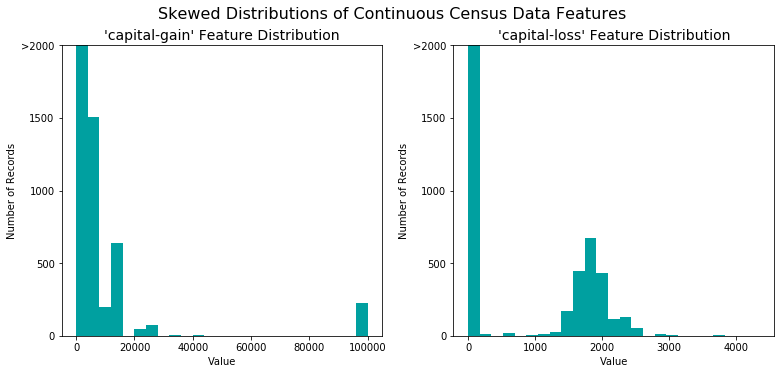

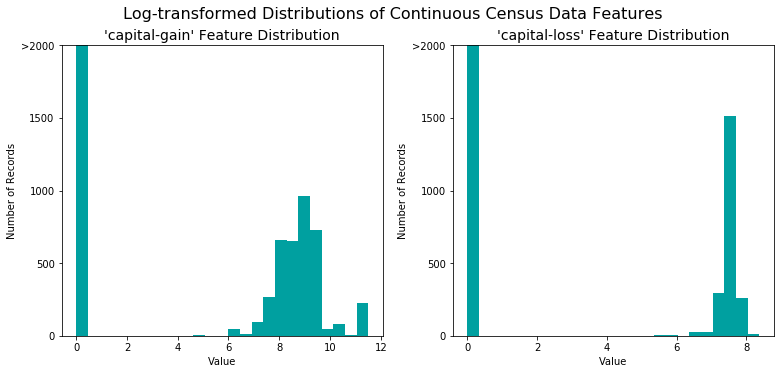

In [15]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pandas as pd
from time import time
from IPython.display import display


import visuals as vs
data = pd.read_csv("census.csv")


display(data.head(n=2))

income_raw =data["income"]  #返回的是Series

features_raw = data.drop("income",axis = 1)


vs.distribution(features_raw)


skewed = ['capital-gain','capital-loss']

features_log_transformed = pd.DataFrame(data = features_raw)

pd.DataFrame(data=features_raw)
features_log_transformed[skewed]= features_raw[skewed].apply(lambda x: np.log(x+1))#lambda 匿名函数，x表示传入的参数

vs.distribution(features_log_transformed,transformed=True)
#归一化数字特征，放缩不会影响特征分布的形状
scaler  = MinMaxScaler() #default(0,1)
numerical =['age','education-num','capital-gain','capital-loss','hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n=5)) # 现在一些数字值都在0- 1之间了


final_features = pd.DataFrame(pd.get_dummies(features_log_minmax_transform))    
                                                                                
display(final_features.head(n = 5))                                             
#编写映射转换income_row
map_income={
    "<=50K":0,
    ">50K":1
}
binary_income = income_raw.map(map_income)
display(binary_income.head(n=15))


#exercise2                                                    
from sklearn.cross_validation import train_test_split         
                                                              
                                                              
#Split hte f"features" and "income" data into training and tes
X_train,X_test,y_train,y_test = train_test_split(final_features,binary_income,test_size = 0.2,random_state = 0)
                                                                                                               
print("Traning set has %s samples" % format(X_train.shape[0]))                                                 
print("Testing set has %s samples" % format(X_test.shape[0]))                                                  
                                                                                                               
                                                              
from sklearn import metrics                                   
                                                              
#Gaussion                                                     
from sklearn.naive_bayes import GaussianNB                    
model = GaussianNB()                                          
model.fit(X_train,y_train)                                    
y_pred = model.predict(X_test)                                
print("Gaussian Naive Bayes:")                                
print(metrics.classification_report(y_test,y_pred))           
                                                              
#Logistic Regression                                          
from sklearn.linear_model import LogisticRegression           
model = LogisticRegression()                                  
model.fit(X_train,y_train)                                    
y_pred = model.predict(X_test)                                
print("LogisticRegression：")                                
print(metrics.classification_report(y_test,y_pred)) 


#Desicion Tree                                     
from sklearn import tree                           
model  = tree.DecisionTreeClassifier()             
model.fit(X_train,y_train)                         
y_pred = model.predict(X_test)                     
print("Dession Tree:")                             
print(metrics.classification_report(y_test,y_pred))

#KNN                                                             
from sklearn.neighbors import KNeighborsClassifier               
model = KNeighborsClassifier()                                   
model.fit(X_train,y_train)                                       
y_pred = model.predict(X_test)                                   
print("KNN:")                                                    
print(metrics.classification_report(y_test,y_pred))              
                                                                 
                                                                 
#SVM                                                             
from sklearn import svm                                          
                                                                 
model = svm.SVC()                                                
model.fit(X_train,y_train)                                       
y_pred = model.predict(X_test)                                   
print("SVM:")                                                    
print(metrics.classification_report(y_test,y_pred))              
                                                                 
